In [ ]:
import tensorflow as tf
print(tf.__version__)
import zipfile,os
import random
import shutil
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image

2.5.0


In [ ]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

Done


In [ ]:
! kaggle datasets download techsash/waste-classification-data
! ls

 98% 417M/427M [00:04<00:00, 111MB/s]
100% 427M/427M [00:04<00:00, 94.4MB/s]
sample_data  waste-classification-data.zip


In [ ]:
import zipfile,os
local_zip = 'waste-classification-data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/DATASET'
train = os.path.join(base_dir, 'TRAIN')
test = os.path.join(base_dir, 'TEST')


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')
 
val_generator = val_datagen.flow_from_directory(
        test, 
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
callbacks = myCallback()

iterate_model = model.fit(
      train_generator,
      steps_per_epoch=100, 
      epochs=100, 
      validation_data=val_generator, 
      validation_steps=20,  
      verbose=1,
      callbacks=[callbacks])

Epoch 1/100
100/100 [==============================] - 17s 136ms/step - loss: 0.5410 - accuracy: 0.7430 - val_loss: 0.4368 - val_accuracy: 0.8275
Epoch 2/100
100/100 [==============================] - 13s 134ms/step - loss: 0.4920 - accuracy: 0.7865 - val_loss: 0.3771 - val_accuracy: 0.8825
Epoch 3/100
100/100 [==============================] - 14s 136ms/step - loss: 0.4454 - accuracy: 0.8115 - val_loss: 0.3651 - val_accuracy: 0.8575
Epoch 4/100
100/100 [==============================] - 14s 136ms/step - loss: 0.4451 - accuracy: 0.8185 - val_loss: 0.3833 - val_accuracy: 0.8525
Epoch 5/100
100/100 [==============================] - 14s 138ms/step - loss: 0.4350 - accuracy: 0.8035 - val_loss: 0.4057 - val_accuracy: 0.8400
Epoch 6/100
100/100 [==============================] - 13s 134ms/step - loss: 0.4275 - accuracy: 0.8195 - val_loss: 0.3921 - val_accuracy: 0.8400
Epoch 7/100
100/100 [==============================] - 13s 133ms/step - loss: 0.4313 - accuracy: 0.8090 - val_loss: 0.4788 -

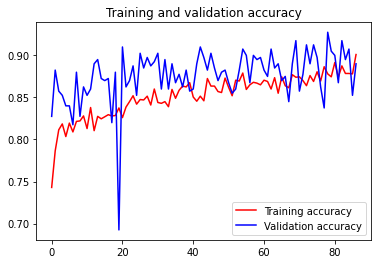

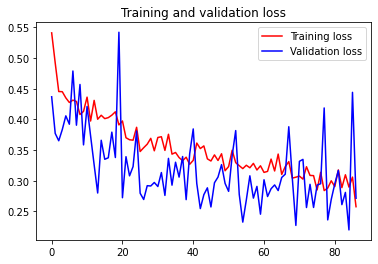

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = iterate_model.history['accuracy']
val_acc = iterate_model.history['val_accuracy']
loss = iterate_model.history['loss']
val_loss = iterate_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
model.evaluate(val_generator)

126/126 [==============================] - 13s 103ms/step - loss: 0.3116 - accuracy: 0.8774


[0.3116425573825836, 0.8774373531341553]

Saving rec1.jpg to rec1.jpg
Saving rec.jpg to rec.jpg
Saving rec3.jpg to rec3.jpg
Saving rec2.jpg to rec2.jpg
Saving organik5.jpg to organik5.jpg
Saving organik4.jpg to organik4.jpg
Saving organik3.jpg to organik3.jpg
Saving organik2.jpg to organik2.jpg
Saving O_13153.jpg to O_13153.jpg
Saving O_12937.jpg to O_12937.jpg
Saving O_12875.jpg to O_12875.jpg
Saving O_12708.jpg to O_12708.jpg
Saving R_10014.jpg to R_10014.jpg
Saving R_10026.jpg to R_10026.jpg
Saving R_10022.jpg to R_10022.jpg
Saving R_10023.jpg to R_10023.jpg
Saving O_12579.jpg to O_12579.jpg
Saving organik1.jpg to organik1.jpg
rec1.jpg
[[0. 1.]]
Rec
rec.jpg
[[0. 1.]]
Rec
rec3.jpg
[[1. 0.]]
Organic
rec2.jpg
[[0. 1.]]
Rec
organik5.jpg
[[0. 1.]]
Rec
organik4.jpg
[[1. 0.]]
Organic
organik3.jpg
[[1. 0.]]
Organic
organik2.jpg
[[1. 0.]]
Organic
O_13153.jpg
[[1. 0.]]
Organic
O_12937.jpg
[[1. 0.]]
Organic
O_12875.jpg
[[1. 0.]]
Organic
O_12708.jpg
[[1. 0.]]
Organic
R_10014.jpg
[[0. 1.]]
Rec
R_10026.jpg
[[0. 1.]]
Rec
R_10022.jpg
[[0. 

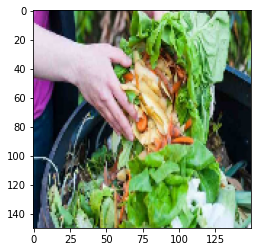

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)

  print(fn)
  print(classes)

  if classes[0][0]:
    print("Organic")
  elif classes[0][1]:
    print("Rec")

In [ ]:
model.save('waste_management2_model.h5')

In [ ]:
model.save('tmp/waste_management_model.h5')